# K-Means Clustering and KNN (K-Nearest Neigbors)


## 1.0 Preparing the Data

We will be analyzing a rather large financial data set of peer-to-peer loans, with lots of data types, messy data, and relationships which closely reflect datasets you can expect to encounter in reality.

In order to work with this data set and apply our more advanced machine learning techniques, we need to first ensure we explore, clean, and prepare the data sufficiently.

## 1.1 Importing and Cleaning the Data

First we need to import and actually remove irrelevant/corrupted rows and columns

In [1]:
# Import the data
import pandas as pd
loans = pd.read_csv('prosperLoanData.csv')

# Examine total shape and preview of data
print(loans.shape)
loans.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


We can examine a dictionary of column names and terms here. In the real world you will not always have any details at all about what you are examining!

Part of working with data and applying machine learning is getting used to use the data itself to tell you what to look at.

https://docs.google.com/spreadsheets/d/13V6bi-8bTYFwNOc3u2v-Ku5Ush35q-WywhfQwcIjKy8/edit?usp=sharing

In this case let's first get rid of all loans still open- we just want to see loans that either Completed, or had some degree of loss for investors.

In [2]:
# Use mask to get only Completed or Defaulted/Chargedoff loans
mask = ((loans['LoanStatus'] == 'Completed') | (loans['LoanStatus'] == 'Defaulted') | (loans['LoanStatus'] == 'Chargedoff'))

loans = loans[mask]

print(loans.shape)
loans.head()

(55084, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,-9.81,0.0,3790.25,3790.25,0.00,1.0,0,0,0.0,10
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85


In [3]:
# Next let's see how our loans break down by Term (length of loan in months)
loans.groupby('Term')['ListingKey'].count()

Term
12     1532
36    49856
60     3696
Name: ListingKey, dtype: int64

In [4]:
# Since vast majority are 3 year loans (30 mo) lets just use those
# Alternative method of filtering, simpler syntax but handling a simpler case than the mask we used above
loans = loans[loans['Term'] == 36 ]

print(loans.shape)
loans.head()

(49856, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,-9.81,0.0,3790.25,3790.25,0.00,1.0,0,0,0.0,10
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85


In [7]:
# We have a potenial bias in our data though:
# Loans which opened within the past 3 years can be Defaulted but not Completed
# To solve this let's remove loans less than 3 years old so we are only comparing 'full term' loans

# First we need to find the latest date in the data

loans['ListingCreationDate'].max()

#type(loans['ListingCreationDate'].max())

'2014-02-10 11:46:03.907000000'

In [8]:
# Now use mask to filter to only loans started 3 years before this data
mask = pd.to_datetime(loans['ListingCreationDate']) < '2011-02-10'
                                                                  
loans = loans[mask]

print(loans.shape)
loans.head()

(37355, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85
21,1017340630713945364DA6B,241498,2007-11-30 20:33:49.227000000,D,36,Completed,2010-12-12 00:00:00,0.21488,0.2075,0.1975,...,-51.12,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53


In [17]:
# Now it's time to go through the columns and identify which ones we want to drop, and which ones to use in analysis

# PY: which columns to take?  this is subjective...
col_to_keep = ['LoanStatus', 'CreditGrade', 'BorrowerAPR', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
               'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
               'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months',
               'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'BankcardUtilization', 
               'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors']

df = loans[col_to_keep]
df = df.dropna(how='any')

print(df.shape)
df.head()

(18506, 23)


,LoanStatus,CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,Completed,C,0.16516,0,CO,Other,Self-employed,2.0,True,640.0,...,3.0,472.0,4.0,0.0,0.00,0.17,True,3083.333333,330.43,258
21,Completed,D,0.21488,0,MI,Professional,Full-time,36.0,False,620.0,...,0.0,5200.0,5.0,1.0,0.08,0.09,True,3750.000000,112.64,53
46,Completed,C,0.17170,1,IL,Accountant/CPA,Full-time,32.0,False,660.0,...,1.0,0.0,29.0,0.0,0.68,0.27,True,3166.666667,138.66,103
59,Completed,C,0.16717,0,IL,Other,Full-time,80.0,False,640.0,...,2.0,0.0,2.0,0.0,0.41,0.37,True,2750.000000,244.47,193
62,Chargedoff,D,0.23748,0,CA,Other,Full-time,16.0,False,600.0,...,3.0,0.0,0.0,0.0,0.89,0.59,True,3891.666667,909.68,384


In [18]:
# Some loans have 0 listed MonthlyPayment which is garbage data, removing these as part of data cleaning
df = df[df['MonthlyLoanPayment'] > 0 ]

print(df.shape)
df.head()

(18216, 23)


,LoanStatus,CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,Completed,C,0.16516,0,CO,Other,Self-employed,2.0,True,640.0,...,3.0,472.0,4.0,0.0,0.00,0.17,True,3083.333333,330.43,258
21,Completed,D,0.21488,0,MI,Professional,Full-time,36.0,False,620.0,...,0.0,5200.0,5.0,1.0,0.08,0.09,True,3750.000000,112.64,53
46,Completed,C,0.17170,1,IL,Accountant/CPA,Full-time,32.0,False,660.0,...,1.0,0.0,29.0,0.0,0.68,0.27,True,3166.666667,138.66,103
59,Completed,C,0.16717,0,IL,Other,Full-time,80.0,False,640.0,...,2.0,0.0,2.0,0.0,0.41,0.37,True,2750.000000,244.47,193
62,Chargedoff,D,0.23748,0,CA,Other,Full-time,16.0,False,600.0,...,3.0,0.0,0.0,0.0,0.89,0.59,True,3891.666667,909.68,384


In [19]:
## Testing converting monthly figures to ratios, didn't improve model accuracy so commented out

# df['OpenRevolvingMonthlyPayment'] = df['OpenRevolvingMonthlyPayment'] / df['StatedMonthlyIncome']
# df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'] / df['StatedMonthlyIncome']

# In case we just divided by 0 above, remove infinite values caused by divide by 0
# import numpy as np
# df = df.replace([np.inf, -np.inf], np.nan)
# df = df.dropna(how='any')

# df.head()

## 1.2 Processing Data

Now that we only have the columns and rows we care about, now we need to ensure all our data is formatted in a way that our models can interpret (for example, 'Occupation' is text not a number)

You'll notice though, working with such a big data set we can't easily view all the columns at once. In real world data sets it is often not reasonable to manually check the format of each and every column. Luckily, we can use pandas to help us identify column formats.

In [20]:
# Display the data types in each column
df.dtypes

LoanStatus                      object
CreditGrade                     object
BorrowerAPR                    float64
ListingCategory (numeric)        int64
BorrowerState                   object
Occupation                      object
EmploymentStatus                object
EmploymentStatusDuration       float64
IsBorrowerHomeowner               bool
CreditScoreRangeLower          float64
OpenCreditLines                float64
TotalCreditLinespast7years     float64
OpenRevolvingMonthlyPayment    float64
InquiriesLast6Months           float64
AmountDelinquent               float64
DelinquenciesLast7Years        float64
PublicRecordsLast10Years       float64
BankcardUtilization            float64
DebtToIncomeRatio              float64
IncomeVerifiable                  bool
StatedMonthlyIncome            float64
MonthlyLoanPayment             float64
Investors                        int64
dtype: object

There are a few data types we will need to clean up:

- int64: if a binary integer (ie 1, 2, 3- used to mark categorical data, we will need dummy columns)
- bool (boolean): need to convert from True and False to numeric
- object: somehow quantify

In [21]:
# First, let's deal with converting boolean to binary 0 or 1 numeric

def bool_to_numeric(x):
    if x:
        return 1
    else:
        return 0
    
df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].apply(bool_to_numeric)
df['IncomeVerifiable'] = df['IncomeVerifiable'].apply(bool_to_numeric)
df[['IsBorrowerHomeowner', 'IncomeVerifiable']].head()

,IsBorrowerHomeowner,IncomeVerifiable
0,1,1
21,0,1
46,0,1
59,0,1
62,0,1


In [22]:
# Next let's look at which int64 columns are categorical data (ie 0 for Monday 1 for Tues 2 for Wednes etc..)
# We need to convert these to dummy columns because Wednesday is not 2x as valuable as Tuesday


# Here (and from column name and column description guide) its clear ListingCategory is categorical data
# We'll need to remember to create a dummy column for ListingCategory with the rest of our non-quantified columns
loans[['ListingCategory (numeric)', 'Investors']].head(10)

,ListingCategory (numeric),Investors
0,0,258
2,0,41
11,0,53
17,0,85
21,0,53
27,1,121
33,7,326
39,0,44
42,0,15
46,1,103


In [23]:
# We've cleaned up booleans, and marked down which int64 columns to fix, now we can handle objects (non-quantified)

# Before dealing with all our non-quantified columns, remember the value we are trying to predict is a special case
# We don't want dummy columns for what we are trying to predict, we want it in one column (so we can predict state)
# Thus, first we need special logic to convert our predicted column

def default_check(x):
    if (x != 'Completed'):
        return 1
    else:
        return 0
    
df['LoanStatus'] = df['LoanStatus'].apply(default_check)
df.head()

,LoanStatus,CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,0,C,0.16516,0,CO,Other,Self-employed,2.0,1,640.0,...,3.0,472.0,4.0,0.0,0.00,0.17,1,3083.333333,330.43,258
21,0,D,0.21488,0,MI,Professional,Full-time,36.0,0,620.0,...,0.0,5200.0,5.0,1.0,0.08,0.09,1,3750.000000,112.64,53
46,0,C,0.17170,1,IL,Accountant/CPA,Full-time,32.0,0,660.0,...,1.0,0.0,29.0,0.0,0.68,0.27,1,3166.666667,138.66,103
59,0,C,0.16717,0,IL,Other,Full-time,80.0,0,640.0,...,2.0,0.0,2.0,0.0,0.41,0.37,1,2750.000000,244.47,193
62,1,D,0.23748,0,CA,Other,Full-time,16.0,0,600.0,...,3.0,0.0,0.0,0.0,0.89,0.59,1,3891.666667,909.68,384


In [24]:
# Now we can handle the rest of our objects (non-quantified columns)
model_data = pd.get_dummies(df,prefix = 'd')

model_data.head()

,LoanStatus,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,...,d_Tradesman - Electrician,d_Tradesman - Mechanic,d_Tradesman - Plumber,d_Truck Driver,d_Waiter/Waitress,d_Full-time,d_Not employed,d_Part-time,d_Retired,d_Self-employed
0,0,0.16516,0,2.0,1,640.0,4.0,12.0,24.0,3.0,...,0,0,0,0,0,0,0,0,0,1
21,0,0.21488,0,36.0,0,620.0,4.0,13.0,15.0,0.0,...,0,0,0,0,0,1,0,0,0,0
46,0,0.17170,1,32.0,0,660.0,9.0,28.0,151.0,1.0,...,0,0,0,0,0,1,0,0,0,0
59,0,0.16717,0,80.0,0,640.0,7.0,25.0,403.0,2.0,...,0,0,0,0,0,1,0,0,0,0
62,1,0.23748,0,16.0,0,600.0,10.0,24.0,1402.0,3.0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# But notice that 'ListingCategory' column is not a dummy. That's because its a number, so isn't caught
# Pandas doesn't know its a categorical number though, so as we noted above, we have to specifically handle

categories = pd.get_dummies(df['ListingCategory (numeric)'], prefix = 'd_category')
categories.head()

,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
0,1,0,0,0,0,0,0,0
21,1,0,0,0,0,0,0,0
46,0,1,0,0,0,0,0,0
59,1,0,0,0,0,0,0,0
62,1,0,0,0,0,0,0,0


In [26]:
# Combine categories dataframe with model_data and drop original ListingCategory column

model_data = pd.concat([model_data, categories], axis=1)
model_data.head()

,LoanStatus,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,...,d_Retired,d_Self-employed,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
0,0,0.16516,0,2.0,1,640.0,4.0,12.0,24.0,3.0,...,0,1,1,0,0,0,0,0,0,0
21,0,0.21488,0,36.0,0,620.0,4.0,13.0,15.0,0.0,...,0,0,1,0,0,0,0,0,0,0
46,0,0.17170,1,32.0,0,660.0,9.0,28.0,151.0,1.0,...,0,0,0,1,0,0,0,0,0,0
59,0,0.16717,0,80.0,0,640.0,7.0,25.0,403.0,2.0,...,0,0,1,0,0,0,0,0,0,0
62,1,0.23748,0,16.0,0,600.0,10.0,24.0,1402.0,3.0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# Now drop out original column
model_data = model_data.drop('ListingCategory (numeric)', axis = 1)
model_data.head()

,LoanStatus,BorrowerAPR,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,...,d_Retired,d_Self-employed,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
0,0,0.16516,2.0,1,640.0,4.0,12.0,24.0,3.0,472.0,...,0,1,1,0,0,0,0,0,0,0
21,0,0.21488,36.0,0,620.0,4.0,13.0,15.0,0.0,5200.0,...,0,0,1,0,0,0,0,0,0,0
46,0,0.17170,32.0,0,660.0,9.0,28.0,151.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
59,0,0.16717,80.0,0,640.0,7.0,25.0,403.0,2.0,0.0,...,0,0,1,0,0,0,0,0,0,0
62,1,0.23748,16.0,0,600.0,10.0,24.0,1402.0,3.0,0.0,...,0,0,1,0,0,0,0,0,0,0


## 1.3 Split into Training and Testing

We have:
- imported the data
- cleaned it up to only rows and columns we care about
- processed data into formats our algorithms can understand
- now, before we on to new algorithms, let's quickly practice running some prediction classifiers on it
- to do that, we need to split into training and testing

In [28]:
# Seperate LoanStatus (our Y we are predicting) from rest of dataframe
X = model_data.drop('LoanStatus', axis = 1)
Y = model_data[['LoanStatus']]

X.head()

,BorrowerAPR,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,...,d_Retired,d_Self-employed,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
0,0.16516,2.0,1,640.0,4.0,12.0,24.0,3.0,472.0,4.0,...,0,1,1,0,0,0,0,0,0,0
21,0.21488,36.0,0,620.0,4.0,13.0,15.0,0.0,5200.0,5.0,...,0,0,1,0,0,0,0,0,0,0
46,0.17170,32.0,0,660.0,9.0,28.0,151.0,1.0,0.0,29.0,...,0,0,0,1,0,0,0,0,0,0
59,0.16717,80.0,0,640.0,7.0,25.0,403.0,2.0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,0
62,0.23748,16.0,0,600.0,10.0,24.0,1402.0,3.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# Seperate data into training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12204, 153)
(6012, 153)
(12204, 1)
(6012, 1)


In [32]:
# Import Logistic Regression and run model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit = LogisticRegression()

logit_model = logit.fit(X_train,Y_train)

predictions = logit_model.predict(X_test)

print('Total defaults: ', Y_test['LoanStatus'].sum())
print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total defaults:  2172
[[3344  496]
 [1314  858]]
             precision    recall  f1-score   support

          0       0.72      0.87      0.79      3840
          1       0.63      0.40      0.49      2172

avg / total       0.69      0.70      0.68      6012



In [33]:
# Import Naive Bayes Classifier and run model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

bayes_model = GaussianNB()
bayes_model.fit(X_train,Y_train)

predictions = bayes_model.predict(X_test)
print('Total defaults: ', Y_test['LoanStatus'].sum())
print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total defaults:  2172
[[3118  722]
 [1274  898]]
             precision    recall  f1-score   support

          0       0.71      0.81      0.76      3840
          1       0.55      0.41      0.47      2172

avg / total       0.65      0.67      0.65      6012



In [34]:
# # Import SVC and run model - BE CAREFUL THIS CELL CAN TAKE A VERY LONG TIME TO RUN
# from sklearn.svm import SVC

# svc_model = SVC(kernel='poly')
# svc_model.fit(X_train,Y_train)
# predictions = svc_model.predict(X_test)
# print('Total defaults: ', Y_test['LoanStatus'].sum())
# print(metrics.confusion_matrix(Y_test, predictions))
# print(metrics.classification_report(Y_test, predictions))

## 2.0 Clustering with K-Means

#### What:
- K-Means algorithm
- Group data into 'K' distinct clusters (where K is an integer)

#### Why:
- To create data labels for unlabelled data, which then allows for further anaylsis
    - Imagine you want to train a classification algorithm engine
    - You have raw data (like customer information), but no labels (ie what do you want to predict)
    - K-Means allows quickly creating labels for each set of customer information
    - This labelled data can now be used in logistic regression, SVC models, etc
    
    
- To create distinct regions for targeted marketing, business, or sales efforts
    - Imagine you have 3 target customer markets (millenial hipster, first time moms, and 20-30 yr singles)
    - You have raw customer information, but no way of systemtically telling which email advertisement to send each
    - You can systemize by clustering into 3 regions, then manually setting each marketing campaign to the 3 clusters
    - This allows for systematic evaluation and refinement of your marketing channels, not possible without ML
    - This example equally applies to loan data:
        - investors might want to cluster loans into different risk/reward portfolios
        - credit card and debt consolidation providers might want to closter loans into different customer segments
        
        
- To visualize data in more discrete buckets
    - Humans like to draw discrete boundaries to make sense of things (these are expensive, these are cheap)
    - Clustering is the automated process of putting things into discrete labels
    - In business world business decisions cut-off points have to happen somewhere, clustering ensures unbiased

#### How:

1. Create K-cluster point centers, called 'centroids' atr random coordinates
2. For each data point, caluclate its distance to each centroid, and assign it to the closest centroid
3. Update the centroid's coordinates to the average coordinates of all data points in its cluster
4. Repreat steps 2+3 until clusters do not change from one run to the next
5. Evaluate the model with metrics like Inertia and Silhouette Coefficient

<img src="http://bigdata-madesimple.com/wp-content/uploads/2015/05/image2.png">

<img src="https://codeahoy.com/img/kmeans/kmeans-animated.gif">

- Notice how the randomly generated initial centroids create a very imprecise green cluster, and a blue cluster split amongst two segments of data
- As a result, each iteration 'pulls' the blue centroid towards the top middle, thus taking more of it out of the green cluster, resulting in the green cluster shifting to the bottom left

<img src="https://thumbs.gfycat.com/AmusingBelovedCentipede-max-1mb.gif">

<img src="https://annalyzin.files.wordpress.com/2015/12/kmeans-clustering-scree-plot.png?w=620">

Pros
- Can run on unlabelled data (huge plus, this is called unsupervised learning)
- Very simple inputs: K value and data points to cluster
- Computationally faster than alternatives such as heirarchical clustering
- Produces tighter clusters than hierarchical clustering, especially if the clusters are spherical

Cons
- Assumes clusters roughly circular/spherical (equal distance spread in every direction from center)
- Clusters do not overlap or nest
- Because initial centroids are randomy, different runs can result in slightly different final clusters
- Assumes clusters are of similar sizes (not number of data points but overall sizes)
- Can not incorporate non-continous data (such as categorical data)

## 2.1 Clustering our Loans

Because we already took the time to clean and process the data, we can pick up where we left off:

In [35]:
model_data.head()

,LoanStatus,BorrowerAPR,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,...,d_Retired,d_Self-employed,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
0,0,0.16516,2.0,1,640.0,4.0,12.0,24.0,3.0,472.0,...,0,1,1,0,0,0,0,0,0,0
21,0,0.21488,36.0,0,620.0,4.0,13.0,15.0,0.0,5200.0,...,0,0,1,0,0,0,0,0,0,0
46,0,0.17170,32.0,0,660.0,9.0,28.0,151.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
59,0,0.16717,80.0,0,640.0,7.0,25.0,403.0,2.0,0.0,...,0,0,1,0,0,0,0,0,0,0
62,1,0.23748,16.0,0,600.0,10.0,24.0,1402.0,3.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Remember that K-Means clustering can only be used on continous data
# This because the average center point and distances from it for categorical data are not really meaningful
# Ie if Dog is 1, Bird 2, and Cat 3, Cat isn't '2 times as far apart from Dog then Bird is'

# We need to check out data dtypes to drop out any non-continous data
df.dtypes

LoanStatus                       int64
CreditGrade                     object
BorrowerAPR                    float64
ListingCategory (numeric)        int64
BorrowerState                   object
Occupation                      object
EmploymentStatus                object
EmploymentStatusDuration       float64
IsBorrowerHomeowner              int64
CreditScoreRangeLower          float64
OpenCreditLines                float64
TotalCreditLinespast7years     float64
OpenRevolvingMonthlyPayment    float64
InquiriesLast6Months           float64
AmountDelinquent               float64
DelinquenciesLast7Years        float64
PublicRecordsLast10Years       float64
BankcardUtilization            float64
DebtToIncomeRatio              float64
IncomeVerifiable                 int64
StatedMonthlyIncome            float64
MonthlyLoanPayment             float64
Investors                        int64
dtype: object

In [37]:
# Dropping all non continous data (note investors is not a float, but is still continous)
cluster_df = df.drop(['LoanStatus', 'CreditGrade', 'BorrowerState', 'ListingCategory (numeric)', 'Occupation', 
                  'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable'], axis = 1)

cluster_df.head()

,BorrowerAPR,EmploymentStatusDuration,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,0.16516,2.0,640.0,4.0,12.0,24.0,3.0,472.0,4.0,0.0,0.00,0.17,3083.333333,330.43,258
21,0.21488,36.0,620.0,4.0,13.0,15.0,0.0,5200.0,5.0,1.0,0.08,0.09,3750.000000,112.64,53
46,0.17170,32.0,660.0,9.0,28.0,151.0,1.0,0.0,29.0,0.0,0.68,0.27,3166.666667,138.66,103
59,0.16717,80.0,640.0,7.0,25.0,403.0,2.0,0.0,2.0,0.0,0.41,0.37,2750.000000,244.47,193
62,0.23748,16.0,600.0,10.0,24.0,1402.0,3.0,0.0,0.0,0.0,0.89,0.59,3891.666667,909.68,384


In [38]:
# Import KMeans model and run 
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(n_clusters = 2)
model = model.fit(cluster_df) 
labels = model.labels_
centers= model.cluster_centers_
print('Number of clusters: ',len(model.cluster_centers_))
# Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are
print('Intertia is: ', model.inertia_)
# Silhouette coefficient is another metric, but cant take a very long time to run on a large data set
# print('Silhouette Coefficient: ' + str(round(metrics.silhouette_score(cluster_df, labels, metric='euclidean'),4)*100)+'%')

Number of clusters:  2
Intertia is:  657723456218.0


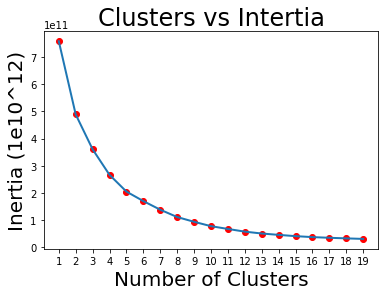

In [41]:
# How many clusters should we create? Well as we've seen already in this class, we need to find an optimal parameter
# We can do this by running our model for various cluster settings
# Note: this is why even when not specifically 'training' a model to predict future data you might want train/test
# Otherwise we might come up with clusters which seem great but won't extrapolate from sample data to reality
num_clusters = []
inertia = []

for i in range (1,20):
    model = KMeans(n_clusters = i)
    model = model.fit(cluster_df) 
    labels = model.labels_
    centers= model.cluster_centers_
    num_clusters.append(i)
    inertia.append(model.inertia_)
    
import matplotlib.pyplot as plt
import numpy as np
plt.plot(num_clusters, inertia, 'ro')
plt.plot(num_clusters, inertia, linewidth=2.0)
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 1.0))
plt.xlabel('Number of Clusters',fontsize = 20)
plt.ylabel('Inertia (1e10^12)',fontsize = 20)
plt.title('Clusters vs Intertia',fontsize = 24)
plt.show()

In [42]:
# The tangent line/inflection point seems to be right around 5, so let's create 5 clusters

# Here dropping a specific outlier I found from trial/error, was always getting a cluster with only this row
mask = ( (cluster_df['MonthlyLoanPayment'] == 167.62) & (cluster_df['Investors'] == 50) )
cluster_df  = cluster_df[~mask]
mask = ( (df['MonthlyLoanPayment'] == 167.62) & (df['Investors'] == 50) )
df  = df[~mask]

# Creating 5 clusters
model = KMeans(n_clusters = 5)
model = model.fit(cluster_df) 
labels = model.labels_
centers= model.cluster_centers_

# The 'centers' variable now describe the centers of each cluster
centersDF = pd.DataFrame(data = centers)
centersDF.columns = cluster_df.columns # get column headers from original df frame we fed into K-means algo
centersDF.head()

,BorrowerAPR,EmploymentStatusDuration,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,0.197129,63.705735,651.907531,7.616359,22.296253,258.250681,2.396378,415.131046,4.688729,0.359493,0.550921,0.374955,3391.613684,203.063806,121.008835
1,0.246733,84.081633,629.795918,4.836735,40.265306,134.265306,2.755102,67550.122449,36.959184,1.510204,0.364082,0.146122,4950.727891,192.756735,76.428571
2,0.157793,111.760000,734.133333,13.700000,38.933333,1574.186667,3.480000,448.000000,2.173333,0.293333,0.557333,0.111533,30748.790556,485.849200,279.840000
3,0.254791,74.810409,605.390335,5.195167,30.663569,146.860595,3.565056,17118.315985,22.262082,0.795539,0.465743,0.231617,4560.718401,154.781041,63.895911
4,0.175329,91.374679,691.777093,11.003082,32.026451,633.554186,2.998716,322.238572,3.172830,0.330508,0.571402,0.192417,8743.732922,329.193909,195.935799


In [43]:
# Add our cluster labels to our dataframe so each data point has an associated cluster
df['Cluster'] = labels

# Notice our last column is now called 'Cluster' and contains a value 0-4 for which cluster the 
df.tail()

,LoanStatus,CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,BankcardUtilization,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors,Cluster
113915,0,D,0.22237,7,MA,Other,Full-time,43.0,1,620.0,...,0.0,9.0,0.0,0.90,0.26,1,4416.666667,1.57,135,0
113918,1,A,0.12201,4,CA,Social Worker,Full-time,252.0,1,740.0,...,0.0,0.0,0.0,0.84,0.39,1,5583.333333,228.51,173,0
113922,0,C,0.15094,5,GA,Other,Full-time,115.0,1,640.0,...,0.0,0.0,0.0,0.28,0.18,1,5250.000000,168.35,145,0
113923,0,B,0.22378,1,MS,Clergy,Full-time,83.0,1,700.0,...,0.0,0.0,0.0,0.34,0.57,1,3966.666667,300.95,270,0
113927,0,AA,0.07469,4,WA,Executive,Full-time,69.0,1,760.0,...,0.0,0.0,0.0,0.72,0.06,1,10333.333333,132.11,194,4


## 2.2 Visualizing Our Clusters

Above we now have our clusters in tabular form, but especially for conveying your work to non-technical clients or managers, the concept and benefit of the clusters you created is best displayed visually.

Remember, we clustered on all our continous data columns, thats 15 dimensionsal space! Without dimensionality reduction, can NEVER visualize the clusters as they look as 15 dimensional 'spheres'...

But we can visualize the clusters for any given pair of two dimensions.

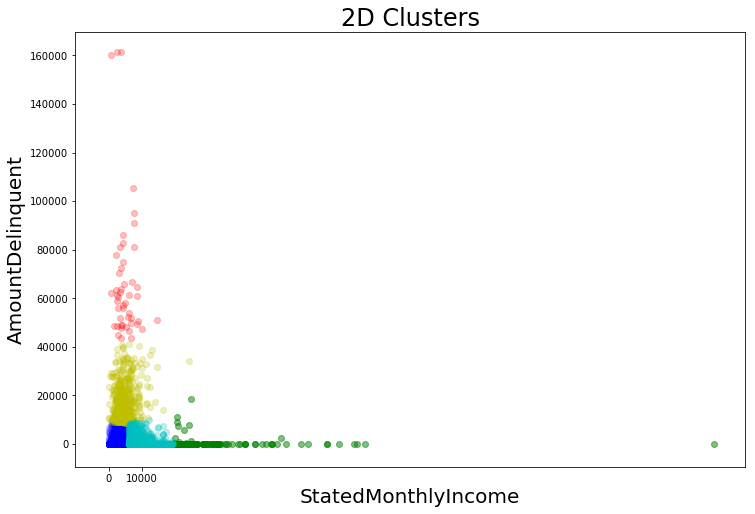

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Create 5 new dataframes by filtering each one to only the rows where 'Cluster' column is equal to a certain value
cluster_0 = df[df['Cluster']==0]
cluster_1 = df[df['Cluster']==1]
cluster_2 = df[df['Cluster']==2]
cluster_3 = df[df['Cluster']==3]
cluster_4 = df[df['Cluster']==4]

# Select our x and y dimensions to chart (saving as variable so easy to quickly change)
y_dim = 'AmountDelinquent'
x_dim = 'StatedMonthlyIncome'

plt.figure(figsize=(12,8))
plt.scatter(cluster_0[x_dim],cluster_0[y_dim],color = 'b', alpha= .1)  # alpha: level of transparency, which shows overlapping better...
plt.scatter(cluster_1[x_dim],cluster_1[y_dim],color = 'r', alpha = .25)
plt.scatter(cluster_2[x_dim],cluster_2[y_dim],color = 'g', alpha= .5)
plt.scatter(cluster_3[x_dim],cluster_3[y_dim],color = 'y', alpha= .25)
plt.scatter(cluster_4[x_dim],cluster_4[y_dim],color = 'c', alpha= .25)
plt.xlabel(x_dim,fontsize = 20)
plt.ylabel(y_dim,fontsize = 20)
plt.title('2D Clusters',fontsize = 24)
plt.xticks(np.arange(0, cluster_4[x_dim].max()+1, 10000))
plt.show()

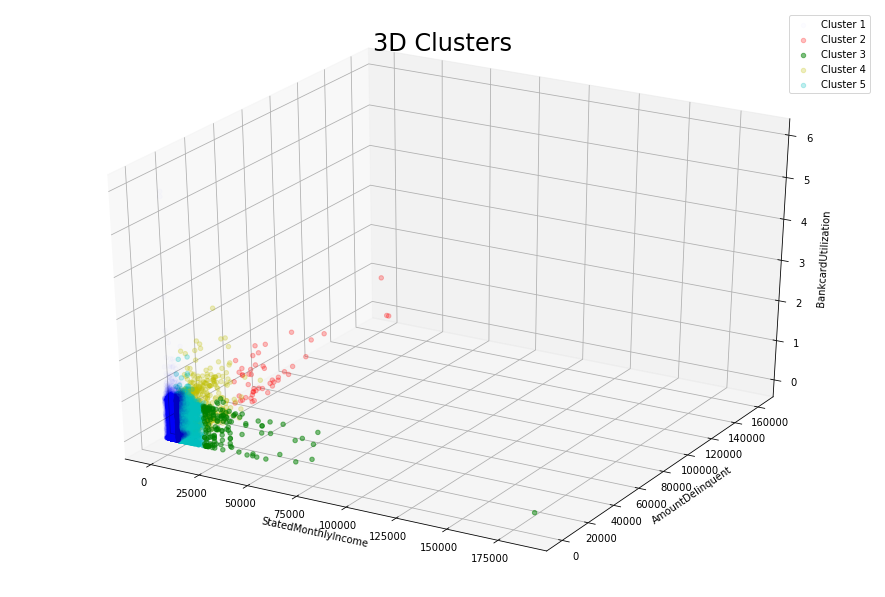

In [46]:
# 2-D is aright for visualzing our clusters...
# But 3-D is even cooler! Now with 50% more dimensions!

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(12,8))
ax = Axes3D(fig)

labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

x_dim = x_dim #set above in 2Dchart
y_dim = y_dim #set above in 2Dchart
z_dim = 'BankcardUtilization'

# Others to try: DebtToIncomeRatio, OpenRevolvingMonthlyPayment, MonthlyLoanPayment  etc...

ax.scatter(cluster_0[x_dim],cluster_0[y_dim],cluster_0[z_dim],color = 'b', alpha=.01)
ax.scatter(cluster_1[x_dim],cluster_1[y_dim],cluster_1[z_dim],color = 'r', alpha=.25)
ax.scatter(cluster_2[x_dim],cluster_2[y_dim],cluster_2[z_dim],color = 'g', alpha=.5)
ax.scatter(cluster_3[x_dim],cluster_3[y_dim],cluster_3[z_dim],color = 'y', alpha=.25)
ax.scatter(cluster_4[x_dim],cluster_4[y_dim],cluster_4[z_dim],color = 'c', alpha=.25)
plt.legend(labels)

# ax.set_xlim3d(0,.4)
# ax.set_ylim3d(0,50000)
# ax.set_zlim3d(0,2.0)

plt.title('3D Clusters',fontsize = 24)
ax.set_xlabel(x_dim)
ax.set_ylabel(y_dim)
ax.set_zlabel(z_dim)
pyplot.show()

There we have it! Our data is now clustered, and ready to feed into futher Machine Learning analysis such as classifier engines which can now use the assigned cluster labels to train at predicting and classifying new data!

Remember, clustering != classification

<img src="https://i.stack.imgur.com/sxEi9.jpg">

Or, we can use our clusters to target specific business segments or customers!

## 3.0 KNN (K-Nearest Neighbors)

KNN is one of the most popular techniques in Machine Learning because of the variety of use cases it be used for, including some use cases we haven't seen any other algorithms for yet.

Much like K-Means Clustering, KNN gets its name from finding the 'K' (where K is an integer) nearest neighbors to any given data point.

For example with a K of 3 and a given row of data, KNN will find the most similar 3 other rows in the entire data set. As you can imagine, one of the most powerful things to create with this are recommendation or matching engines, such as those that power Amazon, Netflix, Tinder, and Uber, but KNN can also be used for classification, and regression.

<br>
So far we have mostly discussed regression and classification models, and though regression models try to predict with a higher level of accuracy (e.g. what will this house cost given features X?), classification models can be much more useful in real life because they are often faster and computationally more efficient while retaining or even improving upon accuracy of regressive models. 

Often, you don't really care about how precise your predictions are, but just want to group your Ys into classes. For example, imagine you are working for Amazon, and someone from marketing tells you that he needs to send email A to people who will spend under $1000 on the website in the next year, and email B to others who will spend above that amount. You could run a regressive model predicting spend for the next year, or you could turn it into a classification problem, much like we did with the housing dataset and logistic regressions (i.e. is this house in my budget?).

This is why KNN is so popular as a technique, because it provides the ability to solve many types of problems, including some problems other models can not solve.

#### What:
- K-Nearest Neighbors algorithm
- Find the 'K' items which are most similar to a provided data point, within a provided sample of data points

#### Why:
- Probabaistic classification (ie if 8 of x's 10 closest neighbors are a high-spending customer, x is perhaps 80% likely to be a high-spending customer)
- Custom recommendation systems- given someone has bought or liked x, suggest x's 5 most similar items
- Text analysis and NLP- given plain text and patterns of words, can run analysis like how similar word x is to other words, allows for simplying general language into fewer terms that NLP algorithms can then work with

#### How:

1. KNN is provided a datapoint/row to find neighbors for
2. Calculates distance between x and each and every other data point in the data set
    - how distance is calculated depends on metric you choose
    - which distance measure is ideal depends on the data structure and relationships you are trying to model
    - Ie. a 6/10 'Kinda Like' rating is by one measure closer to a 4/10 'Kinda Dislike' rating than to a 10/10 'Super Love' rating, but in terms of directionality (like vs dislike) it wouldn't make sense to find a neighbor you would only slightly dislike vs one you would love
3. Finds the K smallest distances, returns those associated data points/rows


Pros
- Easy to understand and execute
- Requires no probabilistic assumptions on the data - unlike Naive Bayes for example (assumes not independent probabilties)
- Data Type Agnostic
- Highly customizable and easy to integrate/combine into larger scale recommendation engines    

Cons 
- Can be bad with dense data - too many close points can give bad predictions
- Computation time can be an issue with big datasets

## 3.1 KNN Classifier

Before worrying about less familiar examples, let's use KNN for a familiar type of problem- classifying data.

Earlier we prepared our loan data, and ran some classifier models on it. Let's pick up where we left off and see how KNN compares.

In [47]:
# Our loan data is still all prepped and waiting for us from earlier...
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(12204, 153)
(6012, 153)
(12204, 1)
(6012, 1)


,BorrowerAPR,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,AmountDelinquent,DelinquenciesLast7Years,...,d_Retired,d_Self-employed,d_category_0,d_category_1,d_category_2,d_category_3,d_category_4,d_category_5,d_category_6,d_category_7
47675,0.10907,49.0,0,720.0,3.0,9.0,92.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2085,0.35613,40.0,0,520.0,5.0,8.0,56.0,14.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
72149,0.10441,353.0,1,760.0,12.0,51.0,1290.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
112028,0.17170,19.0,0,660.0,5.0,21.0,87.0,7.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
78886,0.24507,91.0,1,520.0,3.0,11.0,319.0,2.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Let's re-run a Naive Bayes model as a sanity check
bayes_model = GaussianNB()
bayes_model.fit(X_train,Y_train)

predictions = bayes_model.predict(X_test)
print('Total defaults: ', Y_test['LoanStatus'].sum())
print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions))

C:\devtool\app\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total defaults:  2172
[[3118  722]
 [1274  898]]
             precision    recall  f1-score   support

          0       0.71      0.81      0.76      3840
          1       0.55      0.41      0.47      2172

avg / total       0.65      0.67      0.65      6012



In [49]:
# Now let's import KNN Classifier model and run
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

predictions = knn.predict(X_test)
print('Total defaults: ', Y_test['LoanStatus'].sum())
print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions))

C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Total defaults:  2172
[[3002  838]
 [1464  708]]
             precision    recall  f1-score   support

          0       0.67      0.78      0.72      3840
          1       0.46      0.33      0.38      2172

avg / total       0.59      0.62      0.60      6012



It looks like our KNN isn't as accurate as Naive Bayes in this case, different algos will be suited to different situatons and it's easy to talk about which will general be faster to run, easier to deploy, and more suited to a type of problem (ie classifcation) its extremely difficult to know ahead of time which will be more accurate in a specific situation.

That's why it always ways to be careful about keeping training and testing data seperate, and experimenting! Hence the 'science' in data science.

## 3.2 KNN for Recommendation Systems

An advanced use case is building a recommendation system using just KNN - while we could absolutely build one for our loan data, for example an investor who wants to see loans similiar to ones he wants to invest in, it wouldn't be very intuitive for learning- certainly not as intuitive as classifying which loans defaulted or not.

Keep building a recommender from our financial data set as a challenge for yourself. KNN on its own will be tough enough for now, but at the end you will have everything you need to build an aritifically intelligent financial investments advisor driven by machine learning!

For our KNN we will use it something much more familiar- movies.

Before we use KNN to build a movie recommender we must first understand how a recommendation system works.



Recommendation Systems are ubiquitous nowadays (Amazon's "people who bought this also bought" or Netflix's recommendations based on the movies you watch). The reason they are used is because they add incredible value and have a tangible effect on revenues and engagement. For example, 35% of Amazon's revenue is generated by their recommendation system.

Amazon's engine for example (while proprietary) more than likely considers both
- who you are (and customers similar to you)
- what you looked at/bought (and items also bought with this item, or with similar characteristics)

These two features at common distinctions within recommendation engines:

**Item Based Collaborative Filtering**

Item based recommendation systems give you recommendation systems on what you bought exclusively, e.g., they calculate the nearest neighbors of the items you bought, and return these items as recommendations to you. They exclusively take similarities between items. 

**User Based Collaborative Filtering**

User based recommendation systems on the other hand give you recommendations based on what other users bought, who are deemed similar to you (again, nearest neighbors to you). The way these work is, if I am 'similar' in characteristics to Matt, a user based recommendation system will return things that Matt has bought, that I haven't bought. There are many ways to calculate how simmilar users are, and it can be done through our purchase history, or our characteristics such as age, location, interests etc.

**Custom Recommendation Engines**

Custom recommendation algorithms like Amazon's will combine these techniques. For example to recommend 10 items, they might take the top 5 based on Item based filtering and the top 5 based on User based filtering.

Or- just like we did in this class when combining our various custom algorithms to combine into weighted averages to generate one prediction- Amazon's algorithm could apply a score for item suggestions, combine that with a score for user based suggestions, and take the results with the top overall weighted/combined score.

That's the beauty of knowing how to both write custom algorithms and use machine learning. In the real world problems are rarely solved right out of the box- you will need to combine everything we've learned.

Unlike previous algorithms which we just imported a model and applied it, KNN will require a bit more hands on approach...

Below, we will be making a item based recommendation system.

## 3.3 Building Our KNN Recommender

We are going to follow the following steps to return movie recommendations:

1. Read the data
2. Clean and wrangle the data
3. Normalise continous data and dummy categorical data
4. Use 3. to calculate similarities
5. Return Recommendations

### Similarities

We will have two metrics for calculating similarity (distance): rating and what genres the movie falls under.

Rating data is by user: whenever a user rates a movie, user_id, movie_id and the rating itself are stored. From this, we will calculate how many ratings each movie has, and what the average rating for each movie is. The former, we will use in our recommendation system since it is essentially a popularity score. The latter, we will use as a sanity check at the end.

Genre data is already by movie, but we will have to make it into a list of dummies, which will look like the following: [0,1,0,1,0,1]. This is simply a vector in mathematics. To calculate similarities between movies using genre, we will use a function called 'spatial' which simply tries to see how 'similar' the movies are by checking the angle between those vectors. 

Once we have calculated these similarities, we will do the hardest math of the day: addition. We will add the similarity score of ratings together with the similarity score of genres (because it works well), and then find the closest neighbors.

### A note on Data Types

To calculate similarity scores, we have to perform a lot of wrangling with our data, but we will follow two basic guidelines:

- Continunous columns will be normalised (feature scaling)
- Categorical columns will be turned into dummies

In [50]:
# First, let's get out user ratings data.
# This is stored in a tab delimited file '\t' instead of csv, and stories ratings by user_id for a given movie_id

import pandas as pd
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols, usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


We already decided that we want two rating features per each movie:
- number of ratings (quantity of ratings)
- average rating score (quality of ratings)

This is important becuase we'd expect a very popular movie to have lots of good ratings. A movie with 100 4.5 start ratings would be more similar to a movie with 100 4.0 star ratings, than to a small independent movie with only 3 5.0 star ratings.

In order to take our data, which has a row for each rating, and collapse it into a row for each movie_id, we need to group our data:

In [51]:
import numpy as np

# Grouping our data by movie_id (which is the index) and caluclating the size (# of reviews) and average review score
movieRatings = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieRatings.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [53]:
# Normalizing our ratings - same exact calculation as we have done in class previously
# Feature scaling each number to its percentage of range above the min value
# Ie. the first row's size .77 value means this movie's number of reviews is 77% of the highest value

movieNormalizedNumRatings = movieRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

rating          
              size      mean
movie_id                    
1         0.773585  0.719580
2         0.222985  0.551527
3         0.152659  0.508333
4         0.356775  0.637560
5         0.145798  0.575581

We have movie ratings, now we want to add genre information.

If we look at our data, there are 19 fields, each corresponding to a specific genre - a value of '0' means it is not in that genre, and '1' means it is in that genre. A movie may have more than one genre associated with it.

Before we can worry about KNN, we need to clean to data. We need to store each movie, and for each movie store a list of genres... what data structure works for that type of heirarchical structure?

A dictionary. Let's create a dictionary called movieDict. Each entry will contain the movie name, list of genre values, the normalized popularity score, and the average rating for each movie:

In [54]:
# We are making a new dictionary called movieDict that will have everything we need for our recommendation engine.  


# We are opening the file here, then iterating through each line
movieDict = {}
with open('u.item', encoding = 'ISO-8859-1') as f:
    
#     temp = ''
    for line in f:
        # Conceptually, what we are doing here is very similar to what we did with scraping web data
        # Here, just like with websites, we have data formatted in a arbitrary but consistent manner
        
        # Stripping the new lines at the end of every line using rstrip
        # The delimiter is a pipe here, so we split on that
        fields = line.rstrip('\n').split('|')
#         print(fields)
        
        # Get the movies' ID which is stored in the first position (ie Toy Story's movie_id is 1)
        movieID = int(fields[0])
        
        # Getting the name out so we can sanity check
        name = fields[1]
        
        # Taking all the genre information out into a list
        genres = fields[5:25]
#         print(genres)
        #Converting all the genres from strings to integers
        genres = list(map(int, genres))
#         print(genres)
        
        # Appending all of the above, and the movie ratings info into one dictionary
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].rating.get('size'), movieNormalizedNumRatings.loc[movieID].rating.get('mean'))
#         break

In [55]:
# This is how it looks like
# We have Name, Genre information as a vector, normalised size, and average rating

print(movieDict[1])
print(movieDict[1682])

('Toy Story (1995)', [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.77358490566037741, 0.71957964601769908)
('Scream of Stone (Schrei aus Stein) (1991)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0, 0.5)


In [67]:
for movieId in movieDict.keys():
    print(movieId, ':', movieDict[movieId][0])


1 : Toy Story (1995)
2 : GoldenEye (1995)
3 : Four Rooms (1995)
4 : Get Shorty (1995)
5 : Copycat (1995)
6 : Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
7 : Twelve Monkeys (1995)
8 : Babe (1995)
9 : Dead Man Walking (1995)
10 : Richard III (1995)
11 : Seven (Se7en) (1995)
12 : Usual Suspects, The (1995)
13 : Mighty Aphrodite (1995)
14 : Postino, Il (1994)
15 : Mr. Holland's Opus (1995)
16 : French Twist (Gazon maudit) (1995)
17 : From Dusk Till Dawn (1996)
18 : White Balloon, The (1995)
19 : Antonia's Line (1995)
20 : Angels and Insects (1995)
21 : Muppet Treasure Island (1996)
22 : Braveheart (1995)
23 : Taxi Driver (1976)
24 : Rumble in the Bronx (1995)
25 : Birdcage, The (1996)
26 : Brothers McMullen, The (1995)
27 : Bad Boys (1995)
28 : Apollo 13 (1995)
29 : Batman Forever (1995)
30 : Belle de jour (1967)
31 : Crimson Tide (1995)
32 : Crumb (1994)
33 : Desperado (1995)
34 : Doom Generation, The (1995)
35 : Free Willy 2: The Adventure Home (1995)
36 : Mad Love (1995)
37 : N

278 : Bed of Roses (1996)
279 : Once Upon a Time... When We Were Colored (1995)
280 : Up Close and Personal (1996)
281 : River Wild, The (1994)
282 : Time to Kill, A (1996)
283 : Emma (1996)
284 : Tin Cup (1996)
285 : Secrets & Lies (1996)
286 : English Patient, The (1996)
287 : Marvin's Room (1996)
288 : Scream (1996)
289 : Evita (1996)
290 : Fierce Creatures (1997)
291 : Absolute Power (1997)
292 : Rosewood (1997)
293 : Donnie Brasco (1997)
294 : Liar Liar (1997)
295 : Breakdown (1997)
296 : Promesse, La (1996)
297 : Ulee's Gold (1997)
298 : Face/Off (1997)
299 : Hoodlum (1997)
300 : Air Force One (1997)
301 : In & Out (1997)
302 : L.A. Confidential (1997)
303 : Ulee's Gold (1997)
304 : Fly Away Home (1996)
305 : Ice Storm, The (1997)
306 : Mrs. Brown (Her Majesty, Mrs. Brown) (1997)
307 : Devil's Advocate, The (1997)
308 : FairyTale: A True Story (1997)
309 : Deceiver (1997)
310 : Rainmaker, The (1997)
311 : Wings of the Dove, The (1997)
312 : Midnight in the Garden of Good and Evil

614 : Giant (1956)
615 : 39 Steps, The (1935)
616 : Night of the Living Dead (1968)
617 : Blue Angel, The (Blaue Engel, Der) (1930)
618 : Picnic (1955)
619 : Extreme Measures (1996)
620 : Chamber, The (1996)
621 : Davy Crockett, King of the Wild Frontier (1955)
622 : Swiss Family Robinson (1960)
623 : Angels in the Outfield (1994)
624 : Three Caballeros, The (1945)
625 : Sword in the Stone, The (1963)
626 : So Dear to My Heart (1949)
627 : Robin Hood: Prince of Thieves (1991)
628 : Sleepers (1996)
629 : Victor/Victoria (1982)
630 : Great Race, The (1965)
631 : Crying Game, The (1992)
632 : Sophie's Choice (1982)
633 : Christmas Carol, A (1938)
634 : Microcosmos: Le peuple de l'herbe (1996)
635 : Fog, The (1980)
636 : Escape from New York (1981)
637 : Howling, The (1981)
638 : Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)
639 : Tin Drum, The (Blechtrommel, Die) (1979)
640 : Cook the Thief His Wife & Her Lover, The (1989)
641 : Paths of Glory (1957)
642 : Grifters, Th

946 : Fox and the Hound, The (1981)
947 : Big Blue, The (Grand bleu, Le) (1988)
948 : Booty Call (1997)
949 : How to Make an American Quilt (1995)
950 : Georgia (1995)
951 : Indian in the Cupboard, The (1995)
952 : Blue in the Face (1995)
953 : Unstrung Heroes (1995)
954 : Unzipped (1995)
955 : Before Sunrise (1995)
956 : Nobody's Fool (1994)
957 : Pushing Hands (1992)
958 : To Live (Huozhe) (1994)
959 : Dazed and Confused (1993)
960 : Naked (1993)
961 : Orlando (1993)
962 : Ruby in Paradise (1993)
963 : Some Folks Call It a Sling Blade (1993)
964 : Month by the Lake, A (1995)
965 : Funny Face (1957)
966 : Affair to Remember, An (1957)
967 : Little Lord Fauntleroy (1936)
968 : Inspector General, The (1949)
969 : Winnie the Pooh and the Blustery Day (1968)
970 : Hear My Song (1991)
971 : Mediterraneo (1991)
972 : Passion Fish (1992)
973 : Grateful Dead (1995)
974 : Eye for an Eye (1996)
975 : Fear (1996)
976 : Solo (1996)
977 : Substitute, The (1996)
978 : Heaven's Prisoners (1996)
979 

1234 : Chairman of the Board (1998)
1235 : Big Bang Theory, The (1994)
1236 : Other Voices, Other Rooms (1997)
1237 : Twisted (1996)
1238 : Full Speed (1996)
1239 : Cutthroat Island (1995)
1240 : Ghost in the Shell (Kokaku kidotai) (1995)
1241 : Van, The (1996)
1242 : Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)
1243 : Night Flier (1997)
1244 : Metro (1997)
1245 : Gridlock'd (1997)
1246 : Bushwhacked (1995)
1247 : Bad Girls (1994)
1248 : Blink (1994)
1249 : For Love or Money (1993)
1250 : Best of the Best 3: No Turning Back (1995)
1251 : A Chef in Love (1996)
1252 : Contempt (Mépris, Le) (1963)
1253 : Tie That Binds, The (1995)
1254 : Gone Fishin' (1997)
1255 : Broken English (1996)
1256 : Designated Mourner, The (1997)
1257 : Designated Mourner, The (1997)
1258 : Trial and Error (1997)
1259 : Pie in the Sky (1995)
1260 : Total Eclipse (1995)
1261 : Run of the Country, The (1995)
1262 : Walking and Talking (1996)
1263 : Foxfire (1996)
1264 : Nothing

1531 : Far From Home: The Adventures of Yellow Dog (1995)
1532 : Foreign Student (1994)
1533 : I Don't Want to Talk About It (De eso no se habla) (1993)
1534 : Twin Town (1997)
1535 : Enfer, L' (1994)
1536 : Aiqing wansui (1994)
1537 : Cosi (1996)
1538 : All Over Me (1997)
1539 : Being Human (1993)
1540 : Amazing Panda Adventure, The (1995)
1541 : Beans of Egypt, Maine, The (1994)
1542 : Scarlet Letter, The (1926)
1543 : Johns (1996)
1544 : It Takes Two (1995)
1545 : Frankie Starlight (1995)
1546 : Shadows (Cienie) (1988)
1547 : Show, The (1995)
1548 : The Courtyard (1995)
1549 : Dream Man (1995)
1550 : Destiny Turns on the Radio (1995)
1551 : Glass Shield, The (1994)
1552 : Hunted, The (1995)
1553 : Underneath, The (1995)
1554 : Safe Passage (1994)
1555 : Secret Adventures of Tom Thumb, The (1993)
1556 : Condition Red (1995)
1557 : Yankee Zulu (1994)
1558 : Aparajito (1956)
1559 : Hostile Intentions (1994)
1560 : Clean Slate (Coup de Torchon) (1981)
1561 : Tigrero: A Film That Was Nev

In [56]:
# Now we move on to calculating distance between our vectors and normalised scores
# For the genre vectors, we will be using the spacial function that exists in the scipy library
# For the normalised columns, we will just add them together

from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1] # Getting the genres out here, which are in the second position (1st index) in our list
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB) # Calculating distance here
    popularityA = a[2] # Getting the normlised scores out here, which are in the third position (2nd index) in our list
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB) # Finding the difference between the normalised sizes of each movie
    return genreDistance + popularityDistance # Adding the genre distance and popularity distance and returning it
    
ComputeDistance(movieDict[1], movieDict[2])

1.5506003430531732

In [57]:
# A smaller distance means that the two items are more similar than a bigger number here.
print(movieDict[50])
print(movieDict[181])

ComputeDistance(movieDict[50], movieDict[181])

('Star Wars (1977)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], 1.0, 0.83989726027397271)
('Return of the Jedi (1983)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], 0.86792452830188682, 0.75197238658777121)


0.1320754716981134

In [58]:
import operator

# We will define a function below that will take a movie whose neighbors you want returned, 
# plus an integer, K, which represents how many neighbors you want returned

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict: # Looping through the entire dataset
        if (movie != movieID): # We don't want to return the same movie back of course
            # We compute the distance between our movie and every sigle movie in the dataset
            dist = ComputeDistance(movieDict[movieID], movieDict[movie]) 
            distances.append((movie, dist)) # Once calculated, we append it to the distances list
    distances.sort(key=operator.itemgetter(1))  # Now, we want the closest neighbors, so we can sort our dictionary
    neighbors = [] # Empty list for neighbors so we can just return the list
    for x in range(K): 
        neighbors.append(distances[x][0]) # Choosing just 5 from the distances list to get the K closest neighbors
    return neighbors 

K = 5
movieIdForRecommendations = 50
neighbors = getNeighbors(movieIdForRecommendations, K)

# The loop below is just so we can see what recommendations are being returned

print("Our movie:" + str(movieDict[movieIdForRecommendations][0]) + "  " +  str(movieDict[movieIdForRecommendations][3]))
print('\n')
for neighbor in neighbors:
    print("Recommendation:" + movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Our movie:Star Wars (1977)  0.839897260274


Recommendation:Return of the Jedi (1983) 0.751972386588
Recommendation:Empire Strikes Back, The (1980) 0.801630434783
Recommendation:Independence Day (ID4) (1996) 0.609557109557
Recommendation:Star Trek: First Contact (1996) 0.665068493151
Recommendation:Raiders of the Lost Ark (1981) 0.813095238095


In [61]:
K = 5
movieIdForRecommendations = 167
neighbors = getNeighbors(movieIdForRecommendations, K)

# The loop below is just so we can see what recommendations are being returned

print("Our movie:" + str(movieDict[movieIdForRecommendations][0]) + "  " +  str(movieDict[movieIdForRecommendations][3]))
print('\n')
for neighbor in neighbors:
    print("Recommendation:" + movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Our movie:Private Benjamin (1980)  0.488805970149


Recommendation:Bringing Up Baby (1938) 0.709558823529
Recommendation:Tommy Boy (1995) 0.477272727273
Recommendation:Cool Runnings (1993) 0.540441176471
Recommendation:Kids in the Hall: Brain Candy (1996) 0.519230769231
Recommendation:Naked Gun 33 1/3: The Final Insult (1994) 0.445652173913
